# Машинное обучение, DS-поток
## Задание ML.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 30 баллов;
* Задача 2 &mdash; 70 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 60 баллов.

<b><font size="5">Дорешка:</font></b>
* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил вывод формул</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Исправил выводы</font></b>


In [1]:
# Bot check

# HW_ID: ds_ml4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps

from matplotlib import pyplot as plt
import seaborn as sns
import tqdm

from sklearn import datasets
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

sns.set(font_scale=1.3, palette='Set2')

---
### Задача 1

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$;
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите подробное bias-variance разложение со всеми тремя компонентами: смещение, разброс, шум. Компоненту, отвечающую за разброс, разрешается не доводить до конца. Если в выражении присутствует дисперсия $\varepsilon_i$, то так и пишите: $\mathsf{D}\varepsilon_i$.

Из лекции имеем следующую формулу:

$$
MSE_{\hat{y}(x)}(Y) = (E\hat{y}(X) - Ef(X, \varepsilon))^2 + Df(X, \varepsilon) + D(\hat{y}(X))
$$

где $f(X, \varepsilon) = X^2 + \varepsilon$, $\hat{y}(X) = \hat{\theta}X$

$\text{bias}^2 = (E\hat{y}(X) - Ef(X, \varepsilon))^2$

variance = $D(\hat{y}(X))$

noise = $Df(X, \varepsilon)$

<b><font color="#00b565" size="5">Исправил вывод формул</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Тета с крышкой у тебя вроде бы случайна, почему её мат. ожидание равно ей же? 



Распишем основные величины:

$E\hat{y}(X) = E(\hat{\theta}X) = E(\hat{\theta})E(X) = 0$

$Ef(X, \varepsilon) = E(X^2 + \varepsilon) = E(X^2) = DX + (E(X))^2 = \sigma^2$

$D\hat{y}(X) = D(\hat{\theta}X) = E((\hat{\theta}X)^2) - E^2(\hat{\theta}X) = E((\hat{\theta}X)^2) = E(\hat{\theta}^2) E(X^2) = \sigma^2 E(\hat{\theta}^2)$

$Df(X, \varepsilon) = D(X^2 + \varepsilon) = DX^2 + D\varepsilon$ -- Разрешается не доводить.

В итоге компоненты имеют вид:

$bias^2 = \sigma^4$

variance = $\sigma^2 E(\hat{\theta}^2)$

noise = $Dx^2 + D\varepsilon$ -- Разрешается не доводить.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


---
### Задача 2

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` &mdash; целочисленные признаки. Остальные признаки &mdash; вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [3]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Разбейте данные на train и test, выделив на test 25% данных.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        


Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

Попробуйте получить зависимость от количества деревьев, обучив лишь **один случайный лес**. В этом вам поможет аттрибут `_estimators` у обученной модели. Последовательно вызывайте predict у каждого дерева и усредняйте полученные результаты.

In [5]:
MSE_n_estimators = []
MSE_max_depth = []

n_estimators = np.arange(1, 100)
max_depth = np.arange(3, 26)

random_forest_model = RandomForestRegressor(n_estimators=n_estimators[-1], n_jobs=1)
random_forest_model.fit(X_train_scaled, y_train)

for estimators in tqdm.tqdm(n_estimators):
    pred = np.mean(
        [
            random_forest_model.estimators_[i].predict(X_test_scaled)
            for i in range(estimators)
        ],
        axis=0,
    )
    MSE_n_estimators.append(mean_squared_error(y_test, pred))


for depth in tqdm.tqdm(max_depth):

    model = RandomForestRegressor(max_depth=depth, n_jobs=-1)
    model.fit(X_train_scaled, y_train)

    pred = model.predict(X_test_scaled)

    MSE_max_depth.append(mean_squared_error(y_test, pred))

100%|██████████| 23/23 [02:14<00:00,  5.84s/it]


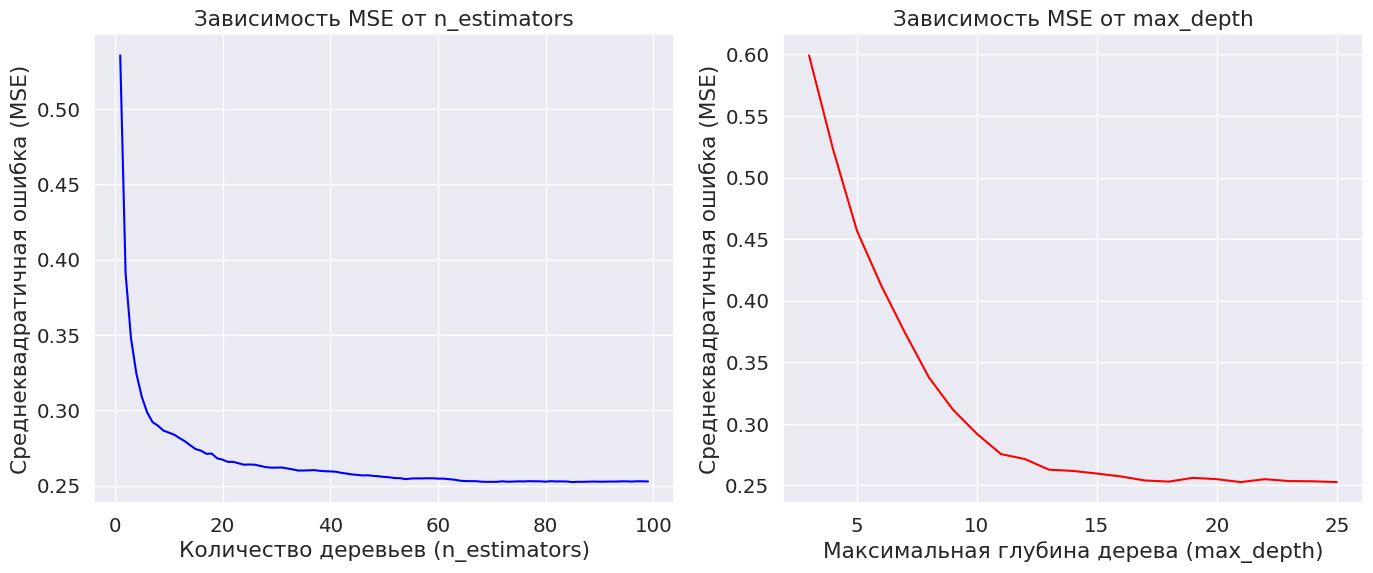

In [6]:
# Построение графиков
plt.figure(figsize=(14, 6))

# График зависимости MSE от n_estimators
plt.subplot(1, 2, 1)
plt.plot(n_estimators, MSE_n_estimators, marker=' ', linestyle='-', color='b')
plt.title('Зависимость MSE от n_estimators')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.grid(True)

# График зависимости MSE от max_depth
plt.subplot(1, 2, 2)
plt.plot(max_depth, MSE_max_depth, marker=' ', linestyle='-', color='r')
plt.title('Зависимость MSE от max_depth')
plt.xlabel('Максимальная глубина дерева (max_depth)')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.grid(True)

plt.tight_layout()
plt.show()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:** 

1. Самое важное -- и с увеличением количества деревьев, и с увеличением глубины лосс уменьшается, что говорит о том что модель начинает лучше предсказывать истинный результат.
Заметим, что хоть обучить модель на ста деревьях вышло быстрее, чем обучить дерево глубины 25. Это говорит в пользу увеличения деревьев, вместо их "углубления".

2. Заметим, что лосс почти не меняется при большом количестве деревьев(это связано с тем, что добавление новых деревьев уже не приносит новой информации, так как новое дерево повторяет деревья, которые уже есть в лесу), в то время как при увеличении глубины лосс все же нимего флуктуирует. 

3. Да, но из-за усреднения деревьев случайный лес более устойчив к переобучению. Таким образом если лес слишком глубок, а деревья повторяют друг друга, то переобучение все же возможно.

Обучите случайный лес с параметрами по умолчанию и выведите MSE на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются? Какие источники случайности есть при построении случайного леса и какие из них реализуются в данном случае?

In [7]:
mse_models = []

for i, _ in enumerate(range(3)):
    model = RandomForestRegressor()
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"MSE {i + 1}-й модели: {mse:.3f}" )



MSE 1-й модели: 2.913
MSE 2-й модели: 3.423
MSE 3-й модели: 4.143


**Ответ:** В стандартной модели генерируется выборка из случайных признаков, по которым формируется трешхолд. Таким образом каждый раз, мы будем получать разные результаты MSE, так как каждый раз выбираются свои оптимальные трешхолды.

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [8]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)
param_grid = {
    "n_estimators": np.arange(20, 50, 10),
    "max_depth": np.arange(12, 22, 3)
}

grid_forest = GridSearchCV(estimator=model, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([12, 15, 18, 21]),
                         'n_estimators': array([20, 30, 40])},
             scoring='neg_mean_squared_error')

Выведите найденные оптимальные параметры.

In [9]:
best_params = grid_forest.best_params_
print("Лучшие параметры:", best_params)

best_model = RandomForestRegressor(**best_params, n_jobs=-1, random_state=42)


Лучшие параметры: {'max_depth': np.int64(21), 'n_estimators': np.int64(40)}


Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [10]:
max_depth = best_params["max_depth"]
n_estimators = best_params["n_estimators"]

Оценим качество предсказаний обученного решающего леса.

In [11]:
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(best_model, X_train, y_train, cv=ss, scoring="neg_mean_squared_error", n_jobs=-1)

print(f"Средняя MSE на кросс-валидации: {-np.mean(scores):.3f}")

Средняя MSE на кросс-валидации: 0.265


Как видим, полученная оценка согласуется с графиками, причем находится близко к оптимуму.

Исследуйте зависимость метрики MSE от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [12]:
n_features = np.arange(1, 9)

MSE_n_features = {"test":[], "train":[]}

for n_feature in n_features:
    print(n_feature, end='\r')
    model = RandomForestRegressor(n_jobs=-1, max_features=n_feature)
    model.fit(X_train_scaled, y_train)

    pred_test = model.predict(X_test_scaled)
    pred_train = model.predict(X_train_scaled)
    MSE_n_features["test"].append(mean_squared_error(y_test, pred_test))
    MSE_n_features["train"].append(mean_squared_error(y_train, pred_train))


for n_feature, mse in zip(n_features, MSE_n_features["test"]):
    print(f"Количество признаков: {n_feature}, MSE на test: {mse:.3f}")

Количество признаков: 1, MSE на test: 0.282
Количество признаков: 2, MSE на test: 0.244
Количество признаков: 3, MSE на test: 0.243
Количество признаков: 4, MSE на test: 0.241
Количество признаков: 5, MSE на test: 0.253
Количество признаков: 6, MSE на test: 0.254
Количество признаков: 7, MSE на test: 0.252
Количество признаков: 8, MSE на test: 0.256


Постройте график зависимости метрики MSE на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

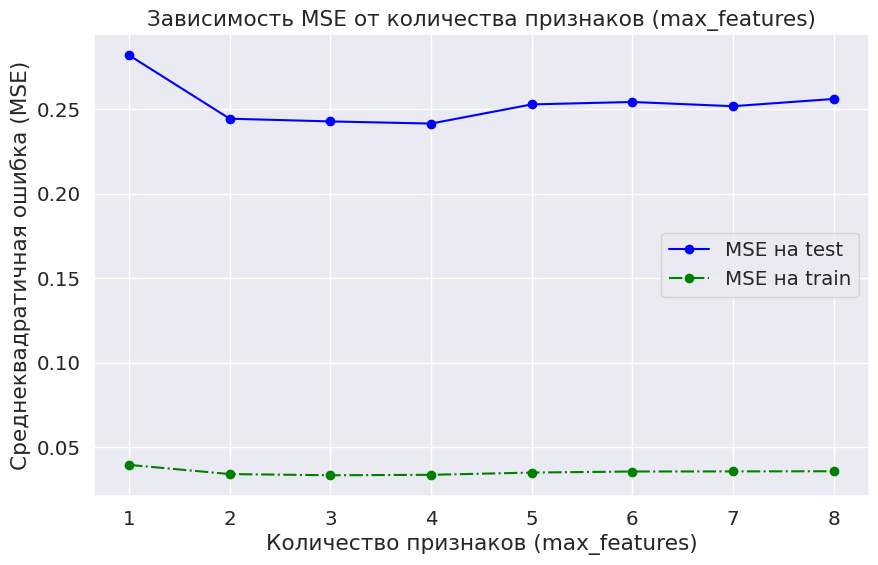

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(n_features, MSE_n_features["test"], marker='o', linestyle='-', color='b', label='MSE на test')

plt.plot(n_features, MSE_n_features["train"], marker='o', linestyle='dashdot', color='g', label='MSE на train')

plt.title('Зависимость MSE от количества признаков (max_features)')
plt.xlabel('Количество признаков (max_features)')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.grid(True)
plt.legend()

plt.show()


Почему график получился таким? Как зависит разнообразие деревьев, инными словами их скоррелированность, от величины `n_features`?

**Ответ:** Ясно, что имеет смысл анализировать только MSE на test. Заметим, что сначала с увеличением количества признаков MSE падает, что может говорить о том, что модель начала находить лучшие трешхолды при помощи добавленных признаков. С увеличением начинает проявляться переобучение модели -- MSE растет. Значит модель начинает видеть ложные зависимости.

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики MSE на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

In [14]:
n_features = np.arange(1, 9)
n_estimators = 50

MSE_bagging_history = {"train": [], "test": []}

for n_feature in tqdm.tqdm(n_features):
    bagging_model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        max_features=n_feature,
        n_jobs=-1,
        n_estimators=n_estimators,
    )
    bagging_model.fit(X_train_scaled, y_train)

    pred_test = bagging_model.predict(X_test_scaled)
    pred_train = bagging_model.predict(X_train_scaled)

    MSE_bagging_history["test"].append(mean_squared_error(y_test, pred_test))
    MSE_bagging_history["train"].append(mean_squared_error(y_train, pred_train))


100%|██████████| 8/8 [00:26<00:00,  3.31s/it]


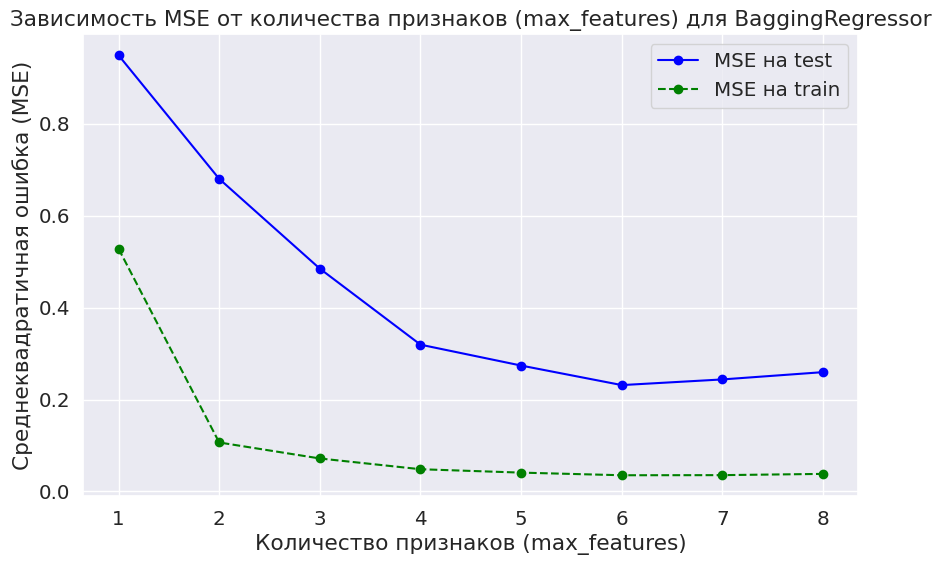

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(n_features, MSE_bagging_history["test"], marker='o', linestyle='-', color='b', label='MSE на test')
plt.plot(n_features, MSE_bagging_history["train"], marker='o', linestyle='--', color='g', label='MSE на train')

plt.title('Зависимость MSE от количества признаков (max_features) для BaggingRegressor')
plt.xlabel('Количество признаков (max_features)')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.grid(True)
plt.legend()
plt.show()

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу? Опирайтесь в своих рассуждениях на bias-variance разложение.

Как видим, случайный лес справляется лучше чем bagging regressor при малом количестве признаков. В этом и выражается то, что мы фиксировали какие-то признаки для всего дерева, то есть добровольно потеряли часть информации. Так случайное дерево случайно выбирает из всех параметров, то он получает больше информации из данных

При увеличении количества признаков модели примерно сравниваются. 

<b><font color="#00b565" size="5">Исправил выводы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Неправильный вывод об источниках случайности случайного леса /Второй пункт с признаками не реализуется.



**Вывод.**

При использовании Bagging regressor мы потеряли случайность в выборе признаков, что вылилось в то, что деревья стали более скорелированными. Это выливается в наличие смещения, а значит и в повышение bias-а. 

Как мы поняли, источниками случайности в случайном лесе используются случайные выборки с возвращением и выделением множества  признаков для поиска оптимального разбиения каждого разбиения в каждой вершине. Заметим, что в модели по умолчанию используются все признаки, а потому признака случайности нет.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

В первом случае, мы фиксируем заранее количество признаков, для каждого дерева. Если количество моделей высоко, то это должно минорно отразится не результате оценки, в ином случае это может привести к потере случайности.

Во втором случае мы меняем параметры модели. Значит теперь каждое дерево будет использовать фиксированное количество параметров, причем одно и то же. Это выльется в отсутствие случайности при выборе признаков, а значит ухудшит оценку, так как увеличит смещение, а значит и bias.

Теоретически можно ожидать, что результат для второго регрессора окажется хуже чем для первого, так оно дает смещенную оценку, а значит более высокий bias.

---
### Задача 3

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели. Для оценки корреляций используйте [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) или [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним.

На лекции нами была получена формула variance для bagging модели:

variance = $D(\hat{y}) = \frac{D\hat{y_1}}{T} \cdot (1 + (T - 1) \cdot \text{corr}(\hat{y_1}(x), \hat{y_2}(x)))$

где $\hat{y}$ -- bagging модель, $\hat{y_1}$ -- базовая модель, T -- количество базовых моделей.

Начнем с решающих деревьев.

In [16]:
def calculate_variance_and_correlation(
    model_name, base_model, X_train, y_train, X_test, y_test
):
    base_model.fit(X_train, y_train)
    pred_base_model = base_model.predict(X_test)
    variance_base_model = np.var(pred_base_model, ddof=1)

    T = 100
    bagging_model = BaggingRegressor(estimator=base_model, n_estimators=T, n_jobs=-1)
    bagging_model.fit(X_train, y_train)

    base_preds = [estimator.predict(X_test) for estimator in bagging_model.estimators_]
    pred_bagging = bagging_model.predict(X_test)

    variance_bagging = np.var(pred_bagging, ddof=1)

    correlation_matrix = np.corrcoef(base_preds)

    correlations = []
    for i in range(T):
        for j in range(i + 1, T):
            correlation = correlation_matrix[i, j]
            correlations.append(correlation)

    plt.figure(figsize=(6, 4))
    plt.hist(correlations, bins=20, edgecolor="black")
    plt.title(f"Гистограмма корреляций предсказаний ({model_name})")
    plt.xlabel("Корреляция")
    plt.ylabel("Частота")
    plt.show()

    first_pred_bagging = base_preds[0]
    second_pred_bagging = base_preds[1]
    correlation = np.corrcoef(first_pred_bagging, second_pred_bagging)[1, 0]

    variance_bagging_formula = (
        np.var(first_pred_bagging, ddof=1) / T
        + (1 - 1 / T) * np.var(first_pred_bagging, ddof=1) * correlation
    )

    print(f"Модель: {model_name}")
    print(f"variance базовой модели: {variance_base_model:.2f}")
    print(
        f"variance bagging модели, рассчитанный при помощи формулы: {variance_bagging_formula:.2f}"
    )
    print(f"variance bagging модели: {variance_bagging:.2f}")
    print(
        f"variance при использовании bagging отличается от variance при использовании базовой модели в {variance_bagging / variance_base_model:.2f} раза\n"
    )

    return correlation_matrix

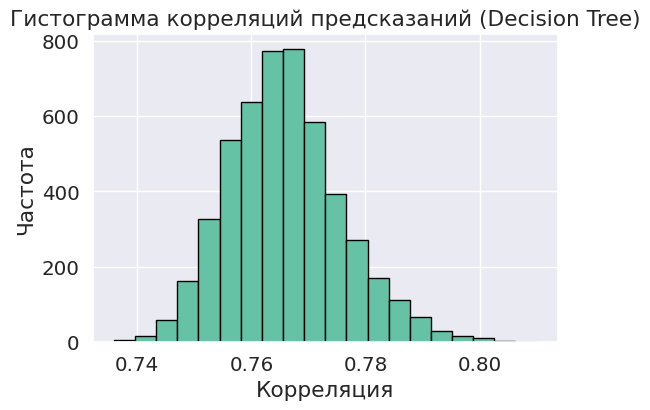

Модель: Decision Tree
variance базовой модели: 1.34
variance bagging модели, рассчитанный при помощи формулы: 0.98
variance bagging модели: 1.02
variance при использовании bagging отличается от variance при использовании базовой модели в 0.76 раза



In [17]:
correlation_matrix_tree = calculate_variance_and_correlation(
    "Decision Tree", DecisionTreeRegressor(), X_train_scaled, y_train, X_test_scaled, y_test)

Как видим, использование bagging позволило уменьшить variance примерно на 25%. Это произошло из-за того, что базовые модели не полность скоррелированными между собой.

Аналогично построим оценки для Ridge регрессии.

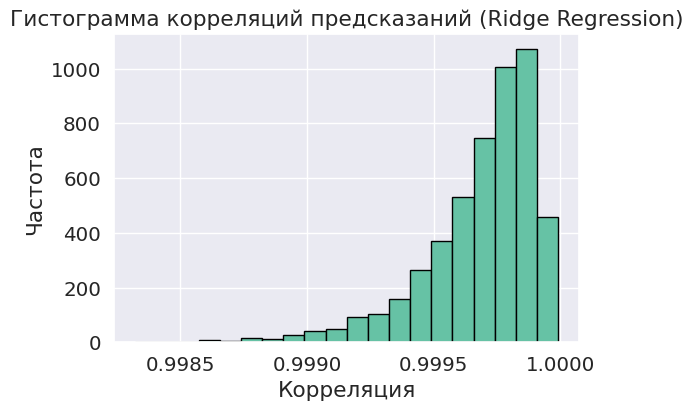

Модель: Ridge Regression
variance базовой модели: 0.79
variance bagging модели, рассчитанный при помощи формулы: 0.77
variance bagging модели: 0.79
variance при использовании bagging отличается от variance при использовании базовой модели в 1.00 раза



In [18]:
correlation_matrix_ridge = calculate_variance_and_correlation(
    "Ridge Regression", Ridge(), X_train_scaled, y_train, X_test_scaled, y_test)

Как видим, корреляция моделей ridge регрессии очень высока, а потому bagging не улучшил показатели

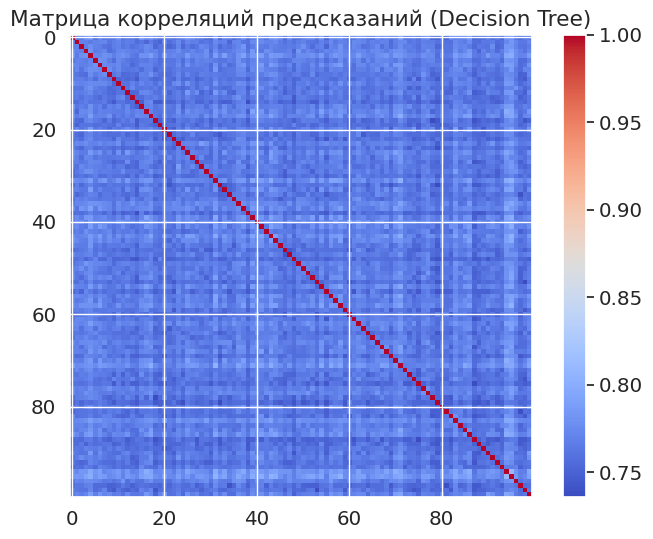

In [19]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix_tree, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Матрица корреляций предсказаний (Decision Tree)")
plt.show()

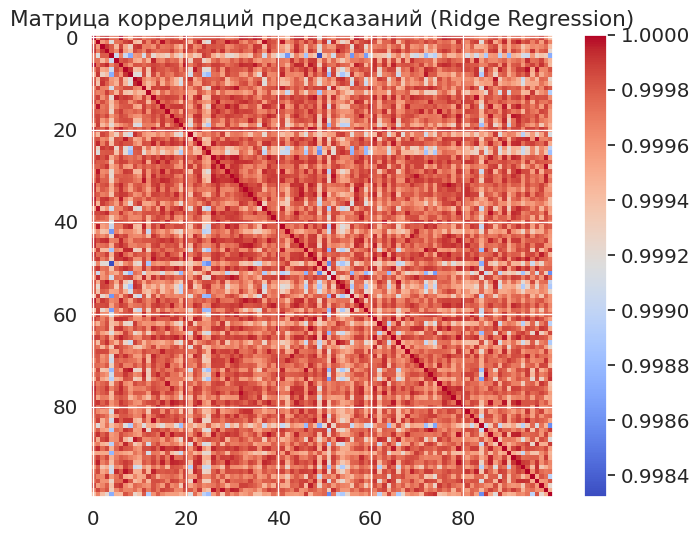

In [20]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix_ridge, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Матрица корреляций предсказаний (Ridge Regression)")
plt.show()

В полученных графиках, можно пронаблюдать, что деревья в скоррелированы намного меньше, чем линейные регрессии, что и позволяет получить выигрыш в подсчете variance.

**Выводы**

На практике проверили формулу для variance. Убедились в важности некоррелированности базовых моделей для успешного применения bagging.

---
### Задача 4

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: **Grid Search** и **Random Search**. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* **Grid Search** &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* **Random Search** &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [21]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

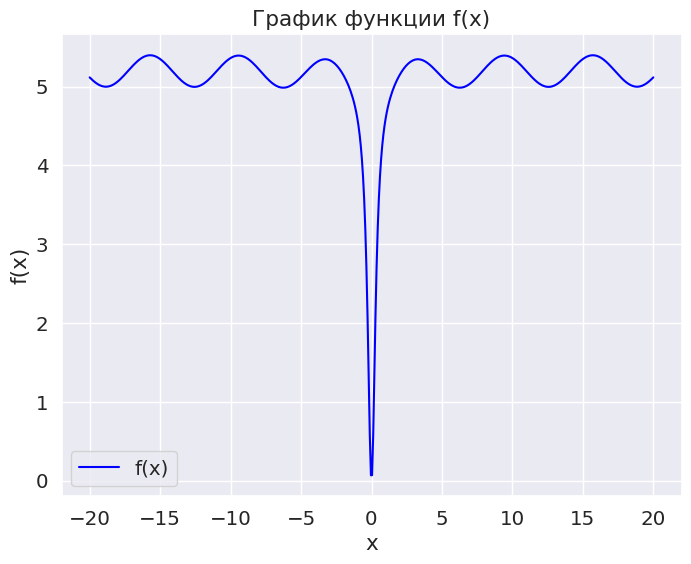

In [22]:
x_values = np.linspace(-20, 20, 500)
y_values = f(x_values)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x)', color='blue', marker=' ')
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

Как видим функция достигает минимума очень резко.

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

**Ответ:**  Мы можем не попасть в отрезок где функция минимальна. Демонстрацию этого мы видели на семинаре.

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [23]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [24]:
# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for _ in tqdm.tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = np.linspace(-10 + x_0, 10 + x_0, n)
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = np.min(f(grid))
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|██████████| 100/100 [00:08<00:00, 12.19it/s]


Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

In [25]:
def plot_minimum_vs_grid_size(grid_size, min_trace, dots):
    """
    Построение графика зависимости найденного минимума от размера сетки.

    Parameters:
    grid_size (np.ndarray): Размеры сетки.
    min_trace (list): Список массивов минимумов для разных экспериментов.
    dots (tuple): Индексы точек для отображения на графике.
    """
    plt.figure(figsize=(10, 6))

    for dot in dots:
        trace_for_dot = min_trace[dot]

        # Построение графика
        plt.plot(grid_size, trace_for_dot, label=f"dots={dot}", alpha=0.7)

    plt.title("Зависимость minimum f от размера сетки для различных точек")
    plt.xlabel("Размер сетки")
    plt.ylabel("Минимум f")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylim((1e-6, 1e1))
    plt.grid(True)
    plt.legend()
    plt.show()

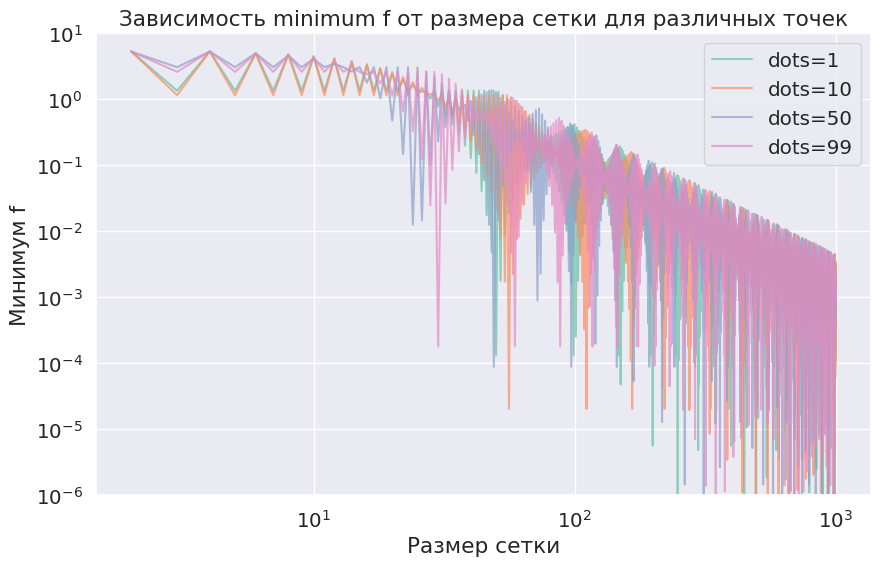

In [26]:
dots = (1, 10, 50, 99)
plot_minimum_vs_grid_size(grid_size, grid_min_f_trace, dots)

Пики -- это и есть попадание на участок, где функция минимальна.

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [27]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 1000)

In [28]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for _ in tqdm.tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points = np.random.uniform(-10, 10, size=1000)
    
    #цикл по количеству точек
    for n in random_size:
        shifted_points = points[:n] + x_0
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = np.min(f(shifted_points))
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

100%|██████████| 100/100 [00:05<00:00, 18.55it/s]


Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

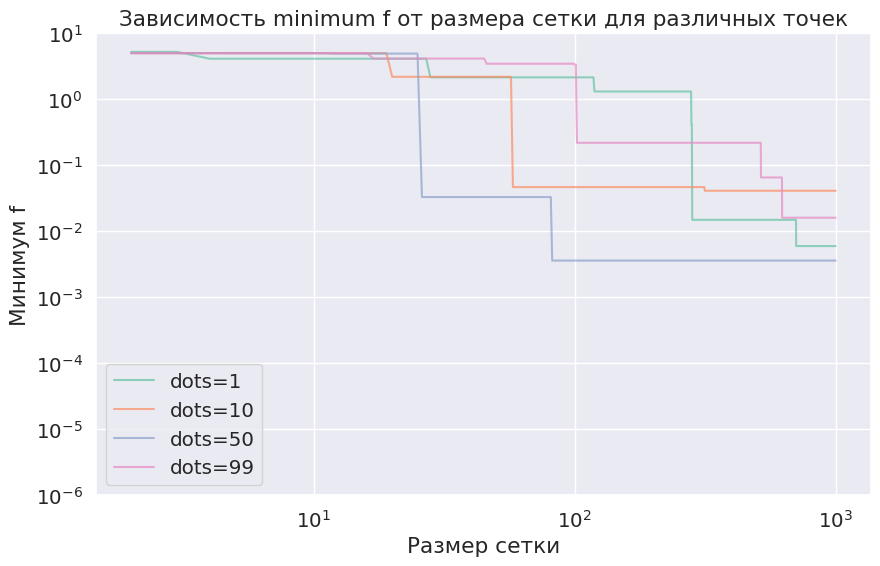

In [29]:
dots = (1, 10, 50, 99)
plot_minimum_vs_grid_size(random_size, random_min_f_trace, dots)

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

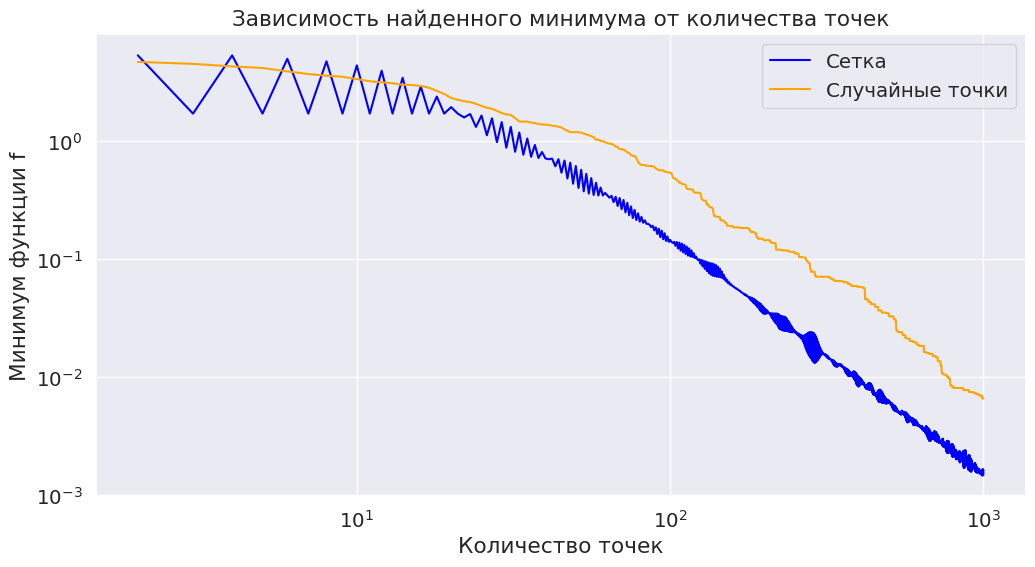

In [30]:
grid_min_f_avg = np.mean(grid_min_f_trace, axis=0)
random_min_f_avg = np.mean(random_min_f_trace, axis=0)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(grid_size, grid_min_f_avg, label='Сетка', color='blue')
plt.plot(random_size, random_min_f_avg, label='Случайные точки', color='orange')
plt.title('Зависимость найденного минимума от количества точек')
plt.xlabel('Количество точек')
plt.ylabel('Минимум функции f')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

Как видим одномерную функцию равномерная сетека предсказывает в среднем лучше, чем при использовании случайных точек.

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [31]:
def f(x, y,):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

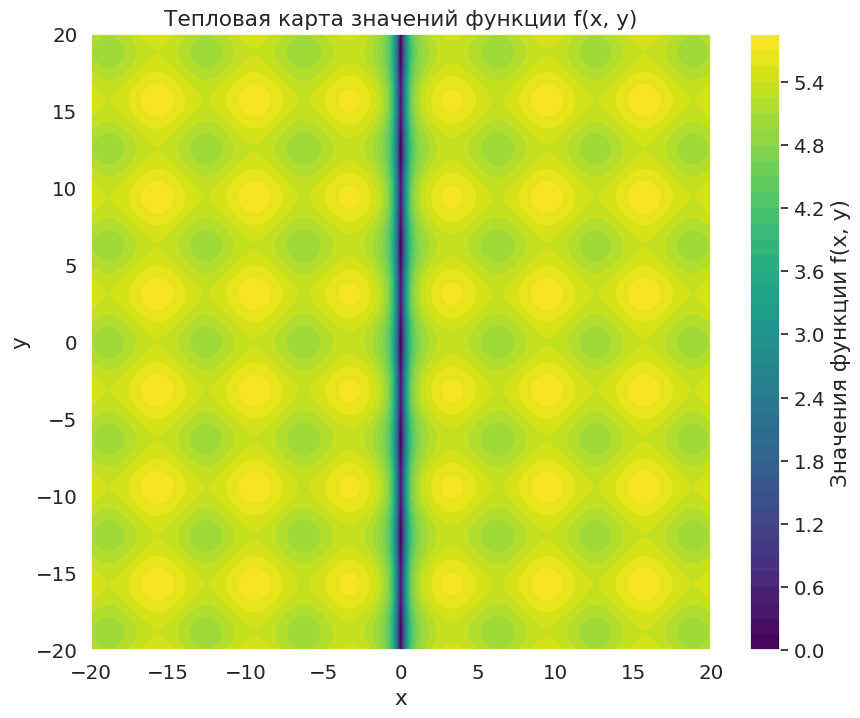

In [32]:
x = np.linspace(-20, 20, 400)
y = np.linspace(-20, 20, 400)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Значения функции f(x, y)')
plt.title('Тепловая карта значений функции f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.show()

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

In [45]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [46]:
grid_min_f_trace = []

for _ in tqdm.tqdm(range(n_experiments)):
    # Случайное смещение сетки на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    y_0 = np.random.uniform(-0.5, 0.5)  # Случайное смещение для y
    # Массив для минимумов для текущего размера сетки
    grid_f_min = []
    # Цикл по размеру сетки
    for n in grid_size:
        # Генерация сетки на [-10, 10] для x и y
        x_grid = np.linspace(-10 + x_0, 10 + x_0, n)
        y_grid = np.linspace(-10 + y_0, 10 + y_0, n)
        X, Y = np.meshgrid(x_grid, y_grid)  # Создание двумерной сетки
        # Вычисление значений функции на сетке
        Z = f(x_grid, y_grid)
        # Найденный по сетке со смещением x_0 и y_0 минимум функции f
        f_min = np.min(Z)
        # Сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # Сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


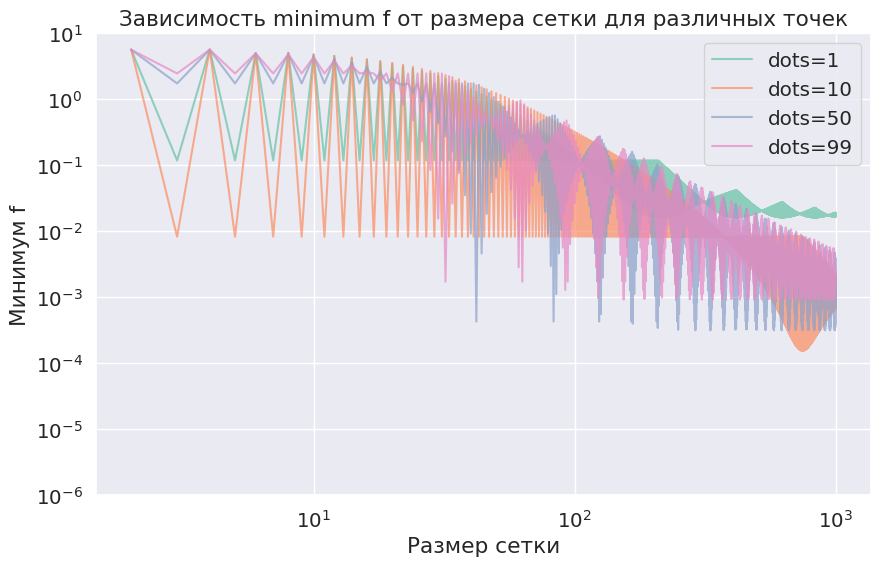

In [47]:
dots = (1, 10, 50, 99)
plot_minimum_vs_grid_size(grid_size, grid_min_f_trace, dots)

In [48]:
# рассматриваемое количество случайных точек
random_size = grid_size**2
n_experiments = 15

In [49]:
random_min_f_trace = []

# Поиск минимума случайными точками
for _ in tqdm.tqdm(range(n_experiments)):
    x_0 = np.random.uniform(-0.5, 0.5)
    y_0 = np.random.uniform(-0.5, 0.5)
    random_min_f = []

    # Генерация случайных точек
    max_points = random_size[-1]  # Максимальное количество точек
    points_x = np.random.uniform(-10, 10, size=max_points) + x_0
    points_y = np.random.uniform(-10, 10, size=max_points) + y_0

    for n in (random_size):
        shifted_points_x = points_x[:n]
        shifted_points_y = points_y[:n]
        
        # Находим минимум функции f для первых n случайных точек
        f_min = np.min(f(shifted_points_x, shifted_points_y))
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

100%|██████████| 15/15 [07:14<00:00, 28.93s/it]


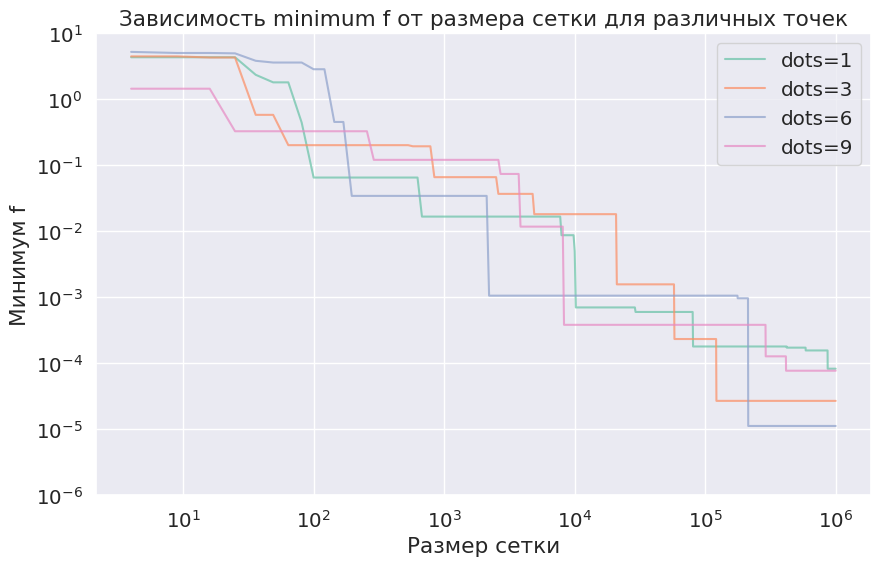

In [50]:
dots = (1, 3, 6, 9)
plot_minimum_vs_grid_size(random_size, random_min_f_trace, dots)

Снова сравним результаты полученные двумя методами

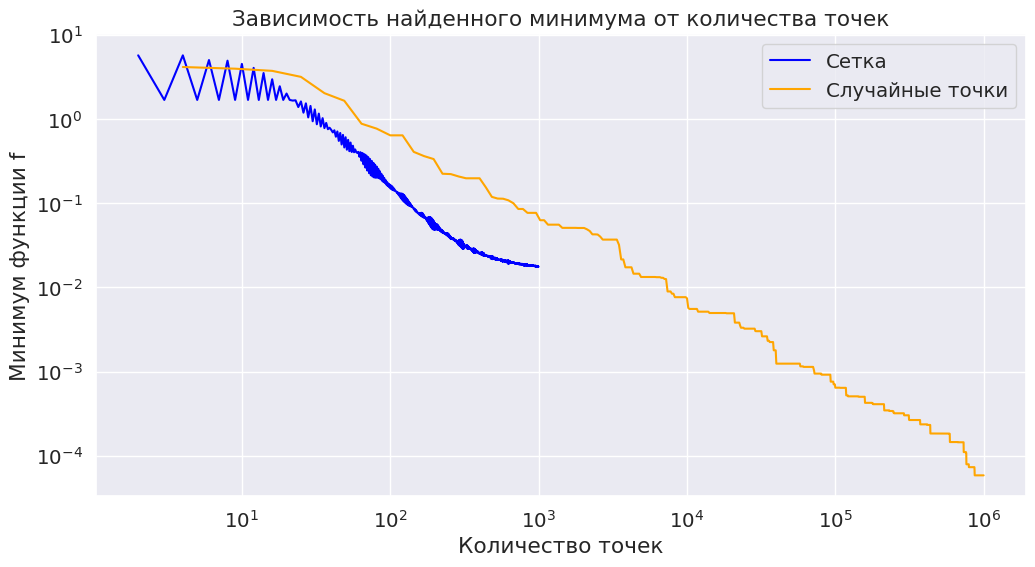

In [51]:
grid_min_f_avg = np.mean(grid_min_f_trace, axis=0)
random_min_f_avg = np.mean(random_min_f_trace, axis=0)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(grid_size, grid_min_f_avg, label='Сетка', color='blue')
plt.plot(random_size, random_min_f_avg, label='Случайные точки', color='orange')
plt.title('Зависимость найденного минимума от количества точек')
plt.xlabel('Количество точек')
plt.ylabel('Минимум функции f')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

Из-за того что точки в сетке находятся на одном уровне, мы она не может покрыть такое обширное множество точек, которое покрывают случайные точки. 

**Вывод:** На практике подвтвердили, использование случайных точек вместо сетки при многомерном отображении дает лучший результат(в нашем случае минимум) в силу того, что случайные точки покрывают больше точек на графике.

В одномерно же случае, ввиду отсутсвия "уровней" выгоды от использования случайных точек мы не получаем. Мы скорее даже ухудшаем результат, т.к. в одномерном покрытии остаются дыры. Таким образом, в случае одномерного отображения разумно использовать сетку.